In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [7]:
data = pd.read_csv('/content/rice_updated10k.csv')
data.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Maize,Monsoon,Dhaka,19216.0,14721,2051.4,1828786.72,5956.96,0.615652
1,Maize,Monsoon,Chittagong,502797.0,1391132,1266.7,47851190.49,155867.07,2.687778
2,Maize,Winter,Chittagong,48844.0,98932,1266.7,4648483.48,15141.64,1.980000
3,Maize,Summer,Chittagong,9730.0,20893,1266.7,926004.10,3016.30,2.165714
4,Maize,Monsoon,Rajshahi,17175.0,24878,3818.2,1634544.75,5324.25,1.444286


In [ ]:
data.to_csv('/content/rice.csv', index=False)

In [8]:
data.shape

(10000, 9)

In [9]:
data.isnull().sum()

Crop               0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [10]:
data.select_dtypes('number').columns

Index(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide',
       'Yield'],
      dtype='object')

In [11]:
categorical = data.select_dtypes(exclude='number').columns
numerical = data.select_dtypes('number').columns

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['Yield'], axis=1)
y = data.Yield
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
transform = [('OHE', OneHotEncoder(), ['Crop', 'Season', 'State']),
 ('MMS', MinMaxScaler(), ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide'])]
ct = ColumnTransformer(transform)


pro_X_train = ct.fit_transform(X_train)
pro_X_test = ct.transform(X_test)

In [14]:
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [15]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Your data preparation steps here (pro_X_train, y_train, pro_X_test, y_test)

# Define a list of models
models = [
    #('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),

    #('Support Vector Machine', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('AdaBoost', AdaBoostRegressor())
]

# Define hyperparameters and their possible values for each model
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
   # 'Support Vector Machine': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Create lists to store the metrics and models
model_names = []
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
trained_models = {}

# Create a dictionary to store best hyperparameters
best_params_dict = {}

# Iterate over models and perform grid search
for model_name, model in models:
    print(f"\nPerforming Grid Search for {model_name}...")

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=5)

    # Fit the model to the training data
    grid_search.fit(pro_X_train, y_train)

    # Print the best parameters and corresponding score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Save the best model
    model_filename = f"{model_name}_model.joblib"
    joblib.dump(best_model, model_filename)
    trained_models[model_name] = model_filename

    # Save the best hyperparameters
    best_params_dict[model_name] = grid_search.best_params_

    # Evaluate the model on the test set
    test_predictions = best_model.predict(pro_X_test)

    # Calculate metrics
    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)

    # Print metrics
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Store metrics in lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Print the best hyperparameters
print("\nBest hyperparameters:")
for model_name, params in best_params_dict.items():
    print(f"{model_name}: {params}")


Streaming output truncated to the last 5000 lines.
23:	learn: 7.4526781	total: 70.8ms	remaining: 76.7ms
24:	learn: 6.8734695	total: 74ms	remaining: 74ms
25:	learn: 6.3488128	total: 77.3ms	remaining: 71.3ms
26:	learn: 5.8338178	total: 80.6ms	remaining: 68.7ms
27:	learn: 5.4023154	total: 82.5ms	remaining: 64.8ms
28:	learn: 4.9644292	total: 85.8ms	remaining: 62.1ms
29:	learn: 4.5955369	total: 89.2ms	remaining: 59.4ms
30:	learn: 4.2711663	total: 92.4ms	remaining: 56.6ms
31:	learn: 3.9220756	total: 97ms	remaining: 54.6ms
32:	learn: 3.6620859	total: 103ms	remaining: 53ms
33:	learn: 3.3954084	total: 106ms	remaining: 49.9ms
34:	learn: 3.1530801	total: 110ms	remaining: 47.1ms
35:	learn: 2.9445425	total: 113ms	remaining: 44ms
36:	learn: 2.7517308	total: 117ms	remaining: 41ms
37:	learn: 2.5727166	total: 121ms	remaining: 38.3ms
38:	learn: 2.4120932	total: 124ms	remaining: 34.9ms
39:	learn: 2.2773859	total: 127ms	remaining: 31.8ms
40:	learn: 2.1609158	total: 131ms	remaining: 28.7ms
41:	learn: 2.044

In [16]:
# Display only model names and their results
for name, r2, mae, mse, rmse in zip(model_names, r2_scores, mae_scores, mse_scores, rmse_scores):
    print(f"\nModel: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")



Model: Decision Tree
R-squared (R²): 0.9999906858626747
Mean Absolute Error (MAE): 0.04204692186173917
Mean Squared Error (MSE): 0.044610222725387845
Root Mean Squared Error (RMSE): 0.21121132243653

Model: K-Nearest Neighbors
R-squared (R²): 0.9998596103421746
Mean Absolute Error (MAE): 0.10780912609160107
Mean Squared Error (MSE): 0.6723987080243824
Root Mean Squared Error (RMSE): 0.8199992122096108

Model: Random Forest
R-squared (R²): 0.9999952255391255
Mean Absolute Error (MAE): 0.037755407339864905
Mean Squared Error (MSE): 0.022867363403165534
Root Mean Squared Error (RMSE): 0.1512195867047835

Model: Gradient Boosting
R-squared (R²): 0.9999964888571977
Mean Absolute Error (MAE): 0.05409930202200146
Mean Squared Error (MSE): 0.016816679522503875
Root Mean Squared Error (RMSE): 0.12967914066072414

Model: XGBoost
R-squared (R²): 0.9999909762368371
Mean Absolute Error (MAE): 0.11906335602070559
Mean Squared Error (MSE): 0.043219470623659974
Root Mean Squared Error (RMSE): 0.20789

In [17]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
import joblib
import numpy as np

# Load individual models
xg_model = joblib.load("/content/XGBoost_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")

# Load your test data (replace this line with your actual test data loading)
# pro_X_test = ...

# Fit individual models if not already fitted
xg_model.fit(pro_X_train, y_train)
rf_model.fit(pro_X_train, y_train)
gb_model.fit(pro_X_train, y_train)

models = {'Xg': xg_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}

ensemble_models = [
    ('Voting', VotingRegressor(estimators=[('XGB', xg_model), ('rf', rf_model), ('gb', gb_model)])),
    ('Stacking', StackingRegressor(estimators=[('XGB', xg_model), ('rf', rf_model), ('gb', gb_model)],
                                   final_estimator=LinearRegression())),
    #('Bagging', BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10))
]

# Create lists to store the metrics
ensemble_names = []
ensemble_r2_scores = []
ensemble_mae_scores = []
ensemble_mse_scores = []
ensemble_rmse_scores = []
ensemble_models_saved = []

# Evaluate ensemble models
for ensemble_name, ensemble_model in ensemble_models:
    print(f"\nEvaluating {ensemble_name}...")

    # Fit the ensemble model
    ensemble_model.fit(pro_X_train, y_train)

    # Predict on the test set using the ensemble model
    ensemble_predictions = ensemble_model.predict(pro_X_test)

    # Calculate metrics
    ensemble_r2 = r2_score(y_test, ensemble_predictions)
    ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
    ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
    ensemble_rmse = np.sqrt(ensemble_mse)

    # Print metrics
    print(f"R-squared (R²) for {ensemble_name}: {ensemble_r2}")
    print(f"Mean Absolute Error (MAE) for {ensemble_name}: {ensemble_mae}")
    print(f"Mean Squared Error (MSE) for {ensemble_name}: {ensemble_mse}")
    print(f"Root Mean Squared Error (RMSE) for {ensemble_name}: {ensemble_rmse}")

    # Store metrics in lists
    ensemble_names.append(ensemble_name)
    ensemble_r2_scores.append(ensemble_r2)
    ensemble_mae_scores.append(ensemble_mae)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_rmse_scores.append(ensemble_rmse)

    # Save the fitted ensemble model
    model_filename = f"{ensemble_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(ensemble_model, model_filename)
    ensemble_models_saved.append(model_filename)

# Display only ensemble model names and their results
for name, r2, mae, mse, rmse in zip(ensemble_names, ensemble_r2_scores, ensemble_mae_scores, ensemble_mse_scores, ensemble_rmse_scores):
    print(f"\nEnsemble Model: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nEnsemble Models Saved:")
for filename in ensemble_models_saved:
    print(filename)



Evaluating Voting...
R-squared (R²) for Voting: 0.9999956482212796
Mean Absolute Error (MAE) for Voting: 0.0638366896631817
Mean Squared Error (MSE) for Voting: 0.020842919874122654
Root Mean Squared Error (RMSE) for Voting: 0.14437077222943243

Evaluating Stacking...
R-squared (R²) for Stacking: 0.9999954998344477
Mean Absolute Error (MAE) for Stacking: 0.05974881706619791
Mean Squared Error (MSE) for Stacking: 0.021553621186705334
Root Mean Squared Error (RMSE) for Stacking: 0.14681151585180685

Ensemble Model: Voting
R-squared (R²): 0.9999956482212796
Mean Absolute Error (MAE): 0.0638366896631817
Mean Squared Error (MSE): 0.020842919874122654
Root Mean Squared Error (RMSE): 0.14437077222943243

Ensemble Model: Stacking
R-squared (R²): 0.9999954998344477
Mean Absolute Error (MAE): 0.05974881706619791
Mean Squared Error (MSE): 0.021553621186705334
Root Mean Squared Error (RMSE): 0.14681151585180685

Ensemble Models Saved:
voting_model.pkl
stacking_model.pkl


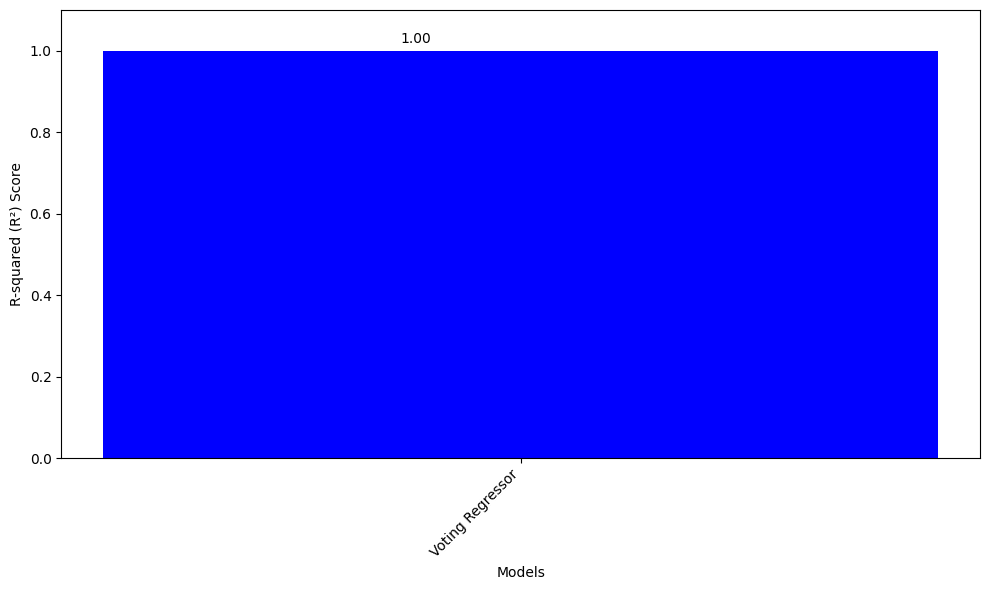

In [18]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Load the saved models

tree_model = joblib.load("/content/voting_model.pkl")
# knn_model = joblib.load("/content/stacking_model.pkl")
# rf_model = joblib.load("/content/Random Forest_model.joblib")
# gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
# ada_model = joblib.load("/content/AdaBoost_model.joblib")
# cat_model = joblib.load("/content/CatBoost_model.joblib")
# linear_model = joblib.load("/content/Linear Regression_model.joblib")
# svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
# xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    # 'K-Nearest Neighbors': knn_model,
    # 'Random Forest': rf_model,
    # 'Gradient Boosting': gb_model,
    # 'AdaBoost': ada_model,
    # 'CatBoost': cat_model,
    # 'Linear Regression': linear_model,
    # 'Support Vector Machine': svm_model,
    # 'XGBoost': xgb_model,
    'Voting Regressor': tree_model,
}

# Evaluate and store R-squared scores for each model
r2_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    r2 = r2_score(y_test, test_predictions)
    r2_scores.append(r2)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('R-squared (R²) Score')
# plt.title('R-squared Scores for Different Models')
plt.ylim(0, 1.1)  # Set the y-axis limit based on your R-squared range (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add R-squared values on top of the bars
for bar, r2_score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{r2_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


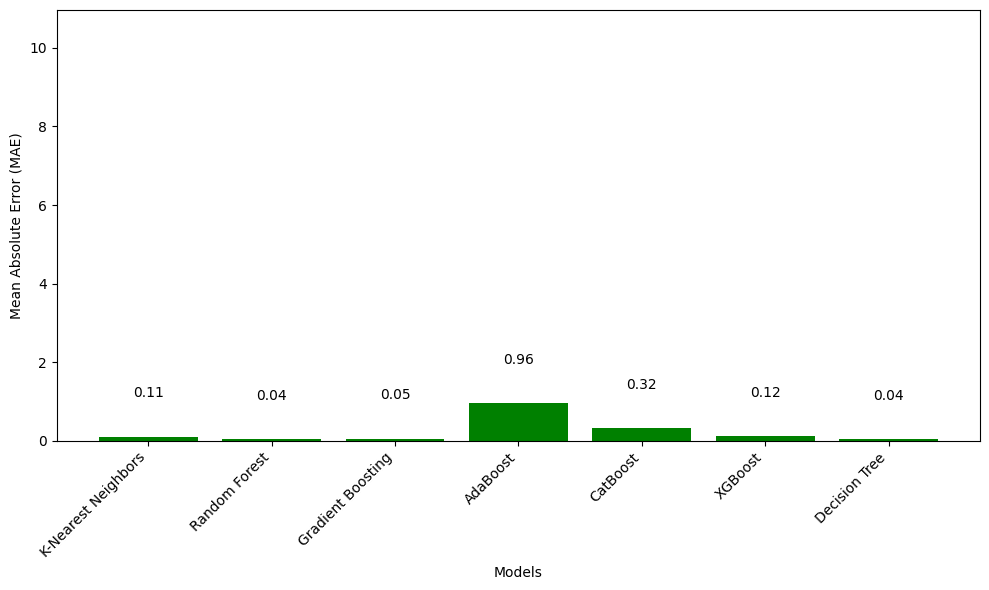

In [19]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# Load the saved models

tree_model = joblib.load("/content/Decision Tree_model.joblib")
knn_model = joblib.load("/content/K-Nearest Neighbors_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
ada_model = joblib.load("/content/AdaBoost_model.joblib")
cat_model = joblib.load("/content/CatBoost_model.joblib")

#linear_model = joblib.load("/content/Linear Regression_model.joblib")
#svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store MAE scores for each model
mae_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mae = mean_absolute_error(y_test, test_predictions)
    mae_scores.append(mae)

# Create a bar chart for MAE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.ylim(0, max(mae_scores) + 10)  # Set the y-axis limit
plt.xticks(rotation=45, ha='right')
# plt.title('Mean Absolute Error (MAE) for Different Models')

# Add MAE values on top of the bars with improved placement
for bar, mae_score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{mae_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


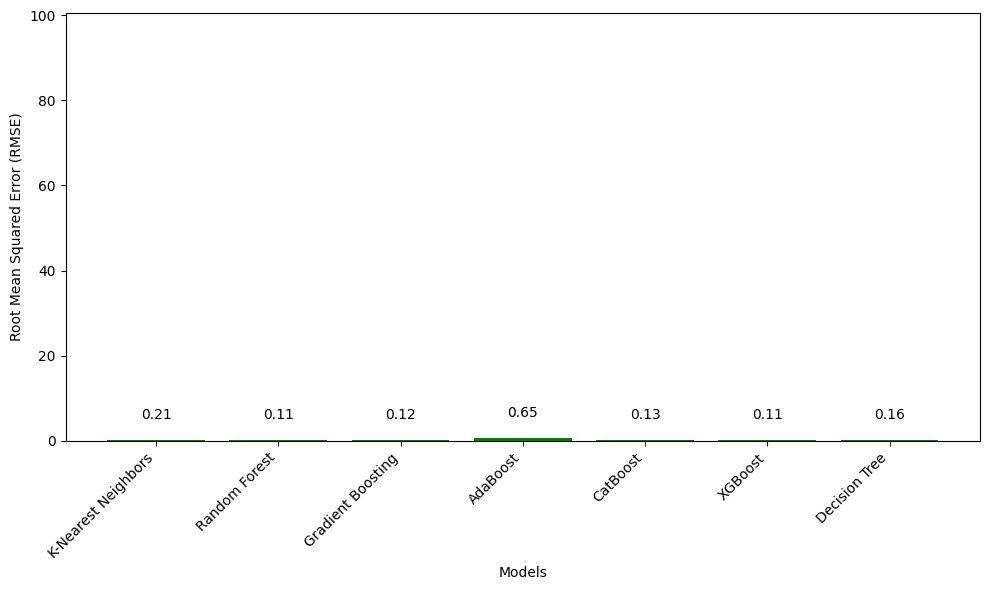

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/Decision Tree_model.joblib")
knn_model = joblib.load("/content/K-Nearest Neighbors_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
ada_model = joblib.load("/content/AdaBoost_model.joblib")
cat_model = joblib.load("/content/CatBoost_model.joblib")
#linear_model = joblib.load("/content/Linear Regression_model.joblib")
#svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

# Create a bar chart for RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_scores) + 100)  # Set the y-axis limit
plt.xticks(rotation=45, ha='right')

# Add RMSE values on top of the bars with improved placement
for bar, rmse_score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{rmse_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [22]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import joblib
import numpy as np

# Load individual models
knn_model = joblib.load("/content/XGBoost_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")

# Load your test data (replace this line with your actual test data loading)
# pro_X_test = ...

# Fit individual models if not already fitted
knn_model.fit(pro_X_train, y_train)
rf_model.fit(pro_X_train, y_train)
gb_model.fit(pro_X_train, y_train)

models = {'KNN': knn_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}

final_estimators = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('AdaBoost', AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=50, learning_rate=1.0)),
    ('Gradient Boosting', GradientBoostingRegressor()),
   # ('SVR', SVR(kernel='linear')),
    ('KNN', KNeighborsRegressor()),
    ('CatBoost', CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE')),
    #('Linear Regression', LinearRegression()),
    ('Gradient Boosting Base', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor())
]

# Create lists to store the metrics
ensemble_names = []
ensemble_r2_scores = []
ensemble_mae_scores = []
ensemble_mse_scores = []
ensemble_rmse_scores = []
ensemble_models_saved = []

# Evaluate ensemble models with different final estimators
for final_name, final_estimator in final_estimators:
    stacking_model = StackingRegressor(
        estimators=[('knn', knn_model), ('rf', rf_model), ('gb', gb_model)],
        final_estimator=final_estimator
    )

    ensemble_name = f'Stacking with {final_name} as Final Estimator'

    print(f"\nEvaluating {ensemble_name}...")

    # Fit the ensemble model
    stacking_model.fit(pro_X_train, y_train)

    # Predict on the test set using the ensemble model
    ensemble_predictions = stacking_model.predict(pro_X_test)

    # Calculate metrics
    ensemble_r2 = r2_score(y_test, ensemble_predictions)
    ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
    ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
    ensemble_rmse = np.sqrt(ensemble_mse)

    # Print metrics
    print(f"R-squared (R²) for {ensemble_name}: {ensemble_r2}")
    print(f"Mean Absolute Error (MAE) for {ensemble_name}: {ensemble_mae}")
    print(f"Mean Squared Error (MSE) for {ensemble_name}: {ensemble_mse}")
    print(f"Root Mean Squared Error (RMSE) for {ensemble_name}: {ensemble_rmse}")

    # Store metrics in lists
    ensemble_names.append(ensemble_name)
    ensemble_r2_scores.append(ensemble_r2)
    ensemble_mae_scores.append(ensemble_mae)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_rmse_scores.append(ensemble_rmse)

    # Save the fitted ensemble model
    model_filename = f"{ensemble_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(stacking_model, model_filename)
    ensemble_models_saved.append(model_filename)

# Display only ensemble model names and their results
for name, r2, mae, mse, rmse in zip(ensemble_names, ensemble_r2_scores, ensemble_mae_scores, ensemble_mse_scores, ensemble_rmse_scores):
    print(f"\nEnsemble Model: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nEnsemble Models Saved:")
for filename in ensemble_models_saved:
    print(filename)



Evaluating Stacking with Decision Tree as Final Estimator...
R-squared (R²) for Stacking with Decision Tree as Final Estimator: 0.9999940811735027
Mean Absolute Error (MAE) for Stacking with Decision Tree as Final Estimator: 0.05604439797410821
Mean Squared Error (MSE) for Stacking with Decision Tree as Final Estimator: 0.028348322458033863
Root Mean Squared Error (RMSE) for Stacking with Decision Tree as Final Estimator: 0.16836960075391835

Evaluating Stacking with AdaBoost as Final Estimator...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R-squared (R²) for Stacking with AdaBoost as Final Estimator: 0.9998486232264309
Mean Absolute Error (MAE) for Stacking with AdaBoost as Final Estimator: 0.153945661549322
Mean Squared Error (MSE) for Stacking with AdaBoost as Final Estimator: 0.7250216899837646
Root Mean Squared Error (RMSE) for Stacking with AdaBoost as Final Estimator: 0.8514820549980866

Evaluating Stacking with Gradient Boosting as Final Estimator...
R-squared (R²) for Stacking with Gradient Boosting as Final Estimator: 0.9999965328502279
Mean Absolute Error (MAE) for Stacking with Gradient Boosting as Final Estimator: 0.058441727670619795
Mean Squared Error (MSE) for Stacking with Gradient Boosting as Final Estimator: 0.01660597413915541
Root Mean Squared Error (RMSE) for Stacking with Gradient Boosting as Final Estimator: 0.12886416933793277

Evaluating Stacking with KNN as Final Estimator...
R-squared (R²) for Stacking with KNN as Final Estimator: 0.9999962602969753
Mean Absolute Error (MAE) for Stacking with K

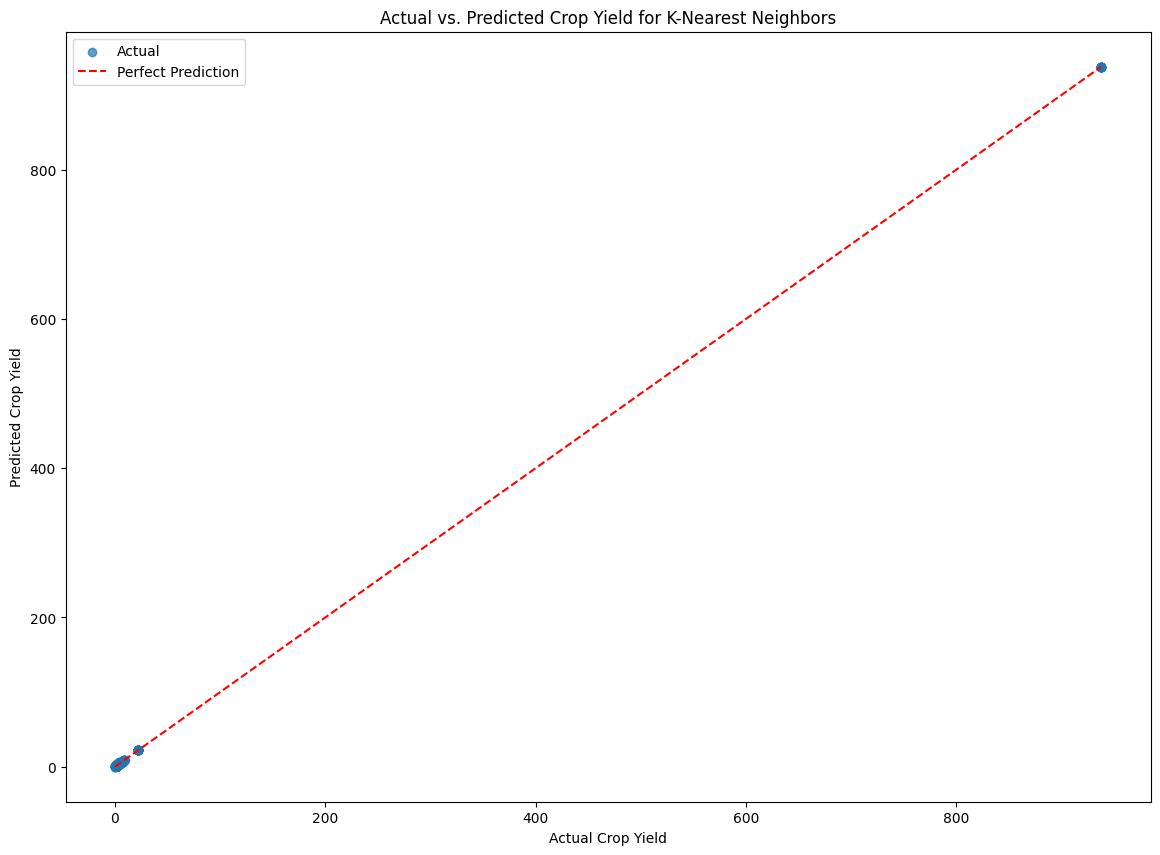

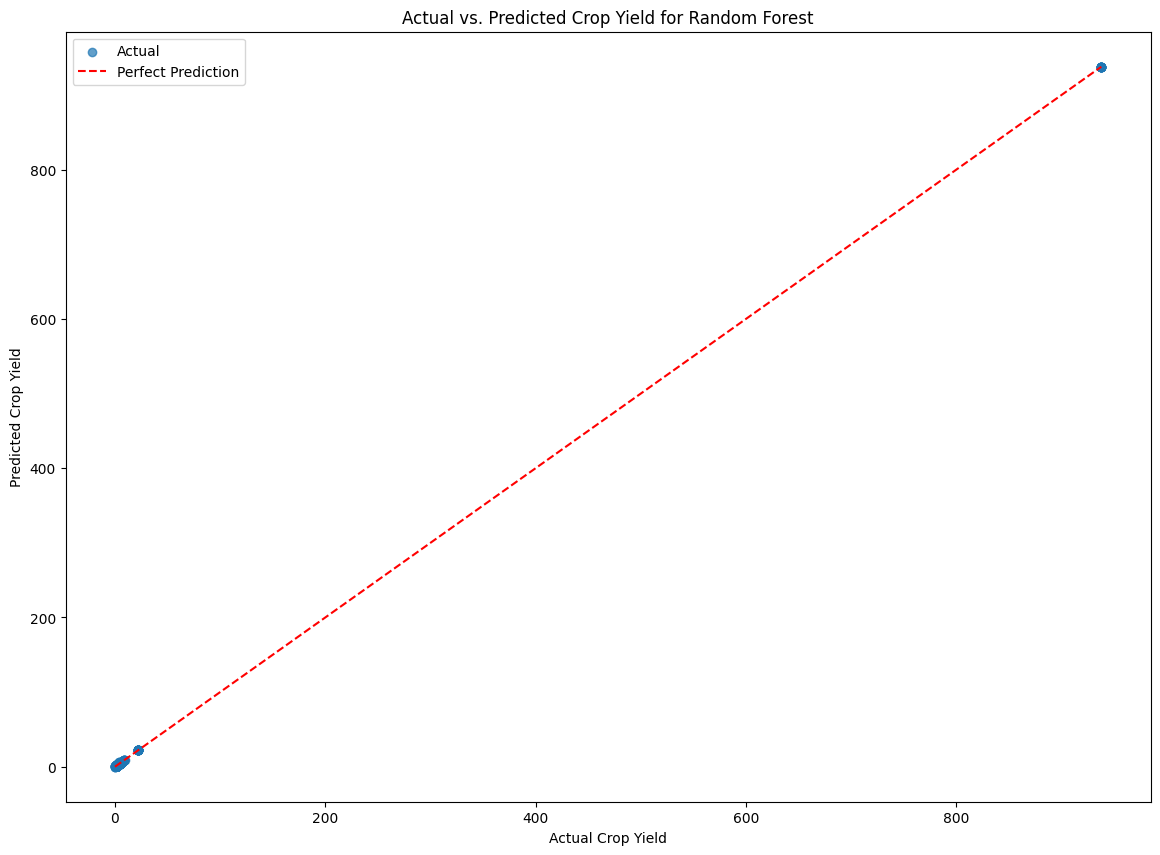

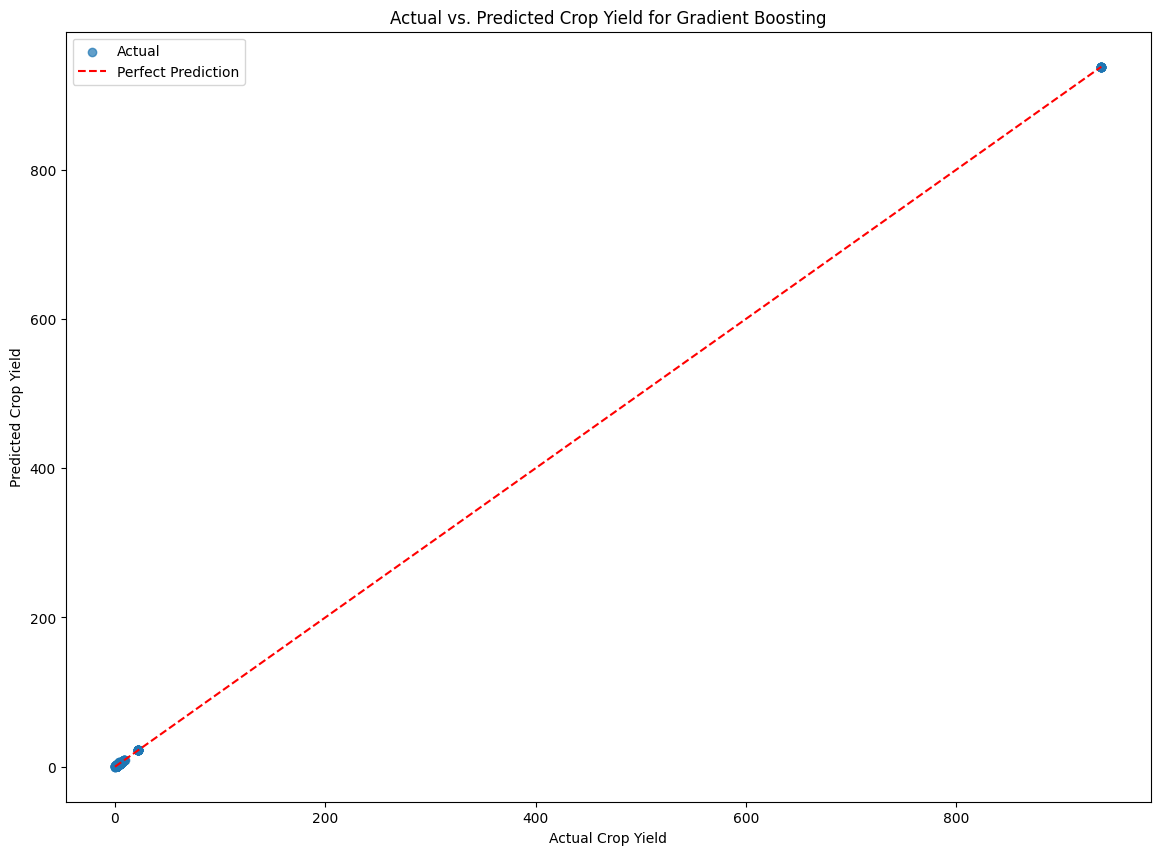

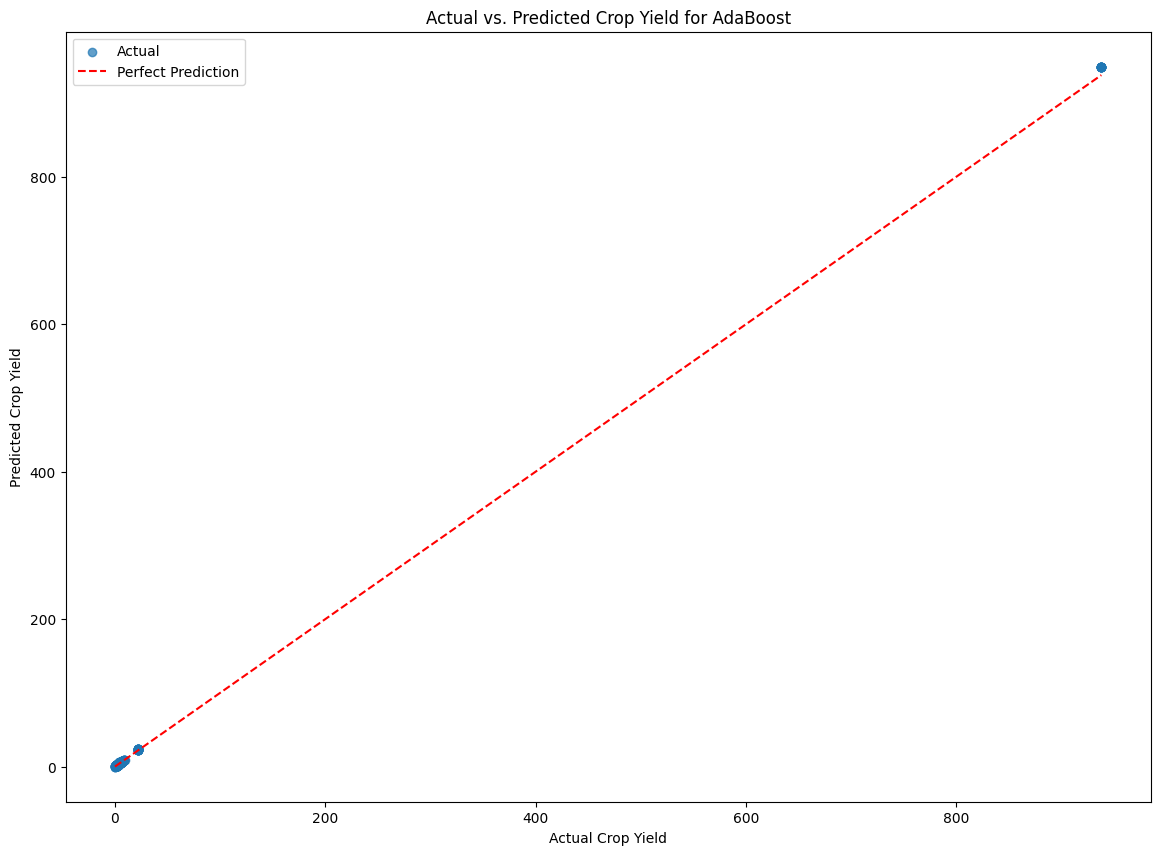

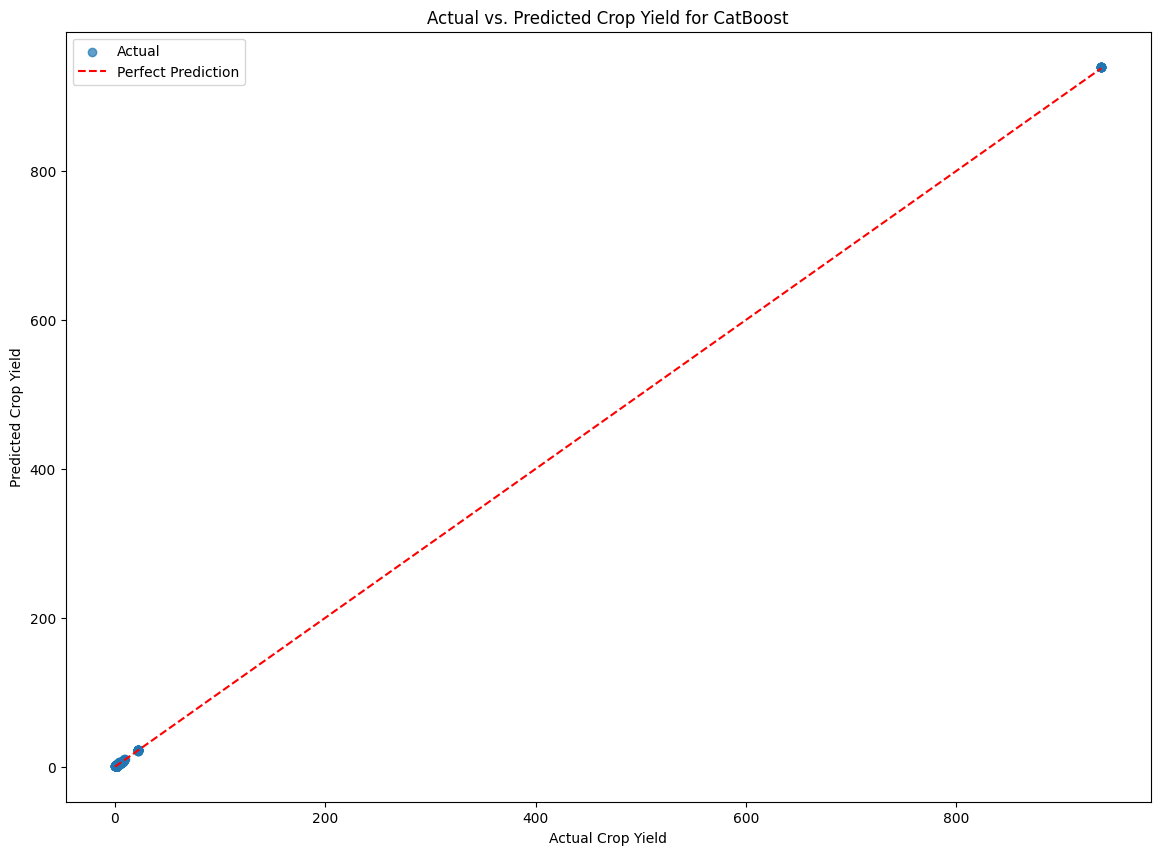

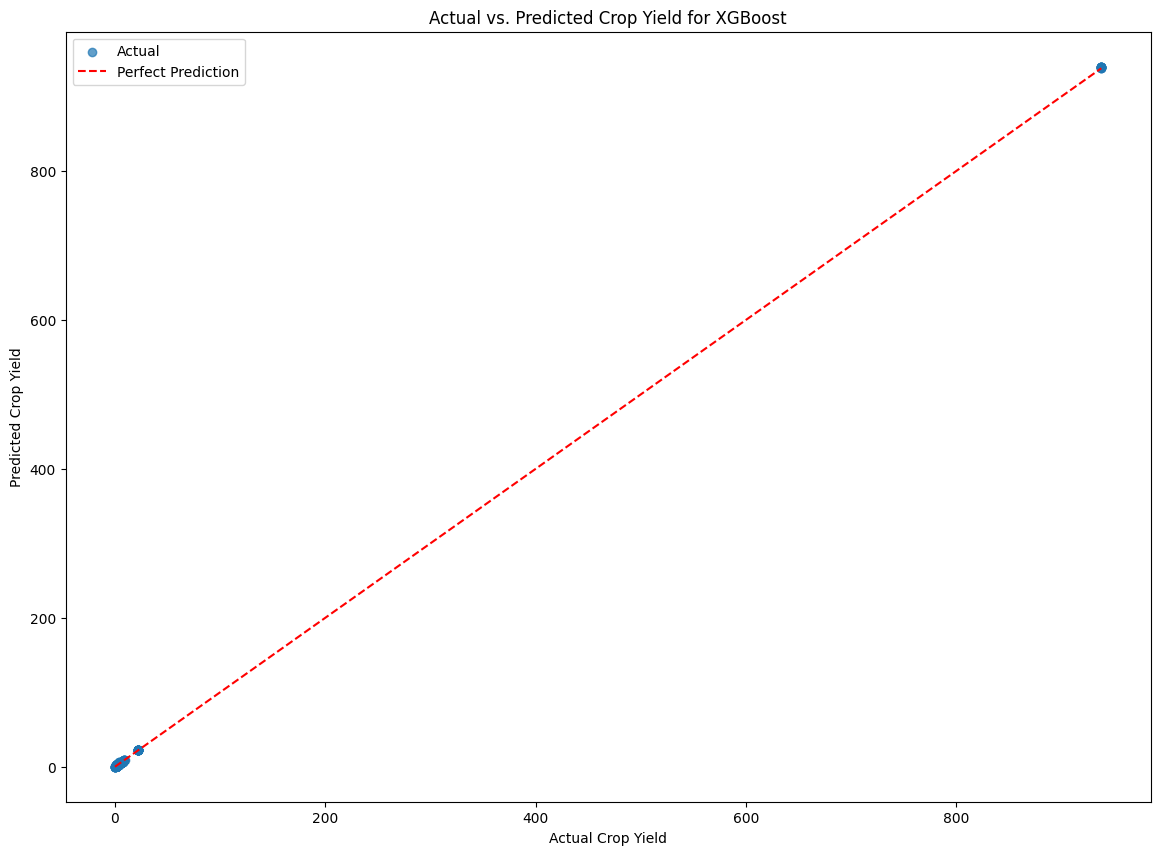

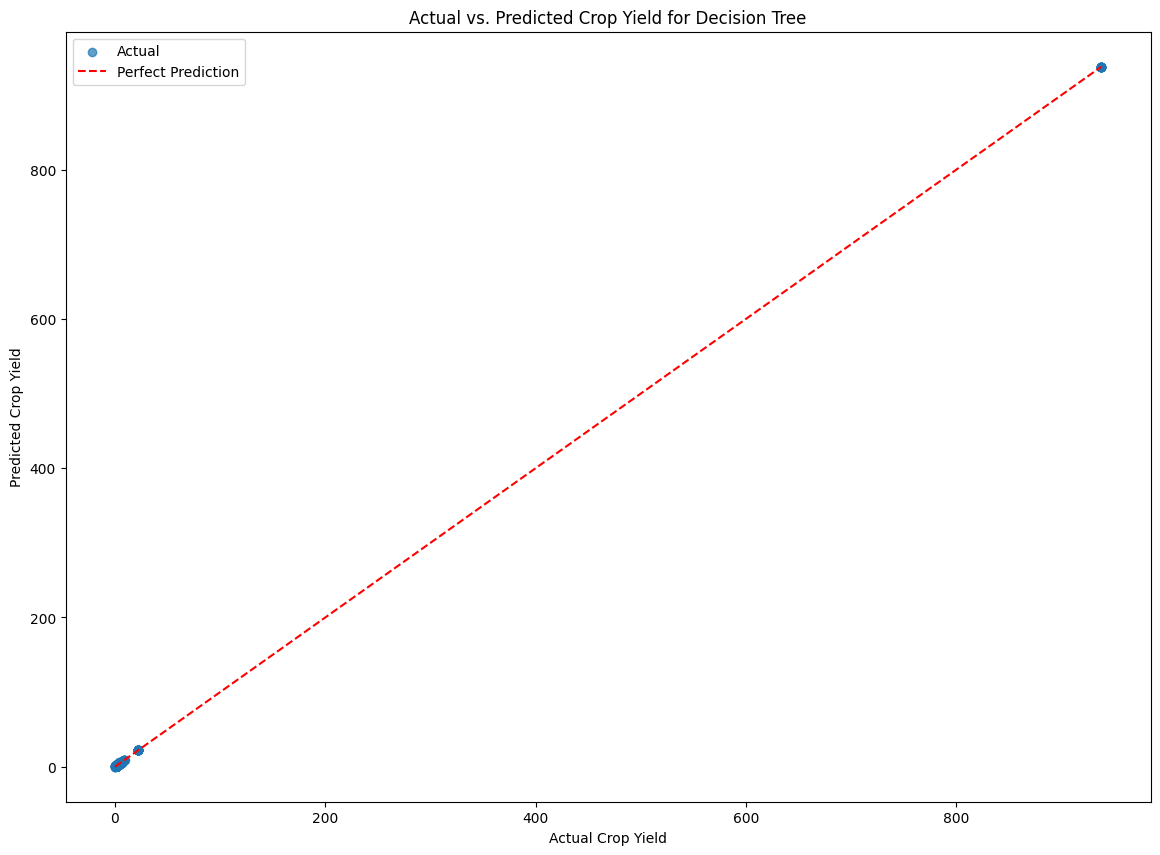

In [23]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/stacking_with_decision_tree_as_final_estimator_model.pkl")
knn_model = joblib.load("/content/stacking_with_knn_as_final_estimator_model.pkl")
rf_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
gb_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
ada_model = joblib.load("/content/stacking_with_adaboost_as_final_estimator_model.pkl")
cat_model = joblib.load("/content/stacking_with_catboost_as_final_estimator_model.pkl")
#linear_model = joblib.load("/content/svr_bagging_model.pkl")
#svm_model = joblib.load("/content/stacking_with_svr_as_final_estimator_model.pkl")
xgb_model = joblib.load("/content/stacking_with_xgboost_as_final_estimator_model.pkl")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())
predictions_dict = {}

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    predictions_dict[model_name] = {'actual': y_test, 'predicted': test_predictions}

# Scatter plot for actual vs. predicted for each model
for model_name, predictions in predictions_dict.items():
    plt.figure(figsize=(14, 10))
    plt.scatter(predictions['actual'], predictions['predicted'], label='Actual', alpha=0.7)
    plt.plot([min(predictions['actual']), max(predictions['actual'])], [min(predictions['actual']), max(predictions['actual'])], '--', color='red', label='Perfect Prediction')
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.title(f"Actual vs. Predicted Crop Yield for {model_name}")
    plt.legend()
    plt.show()


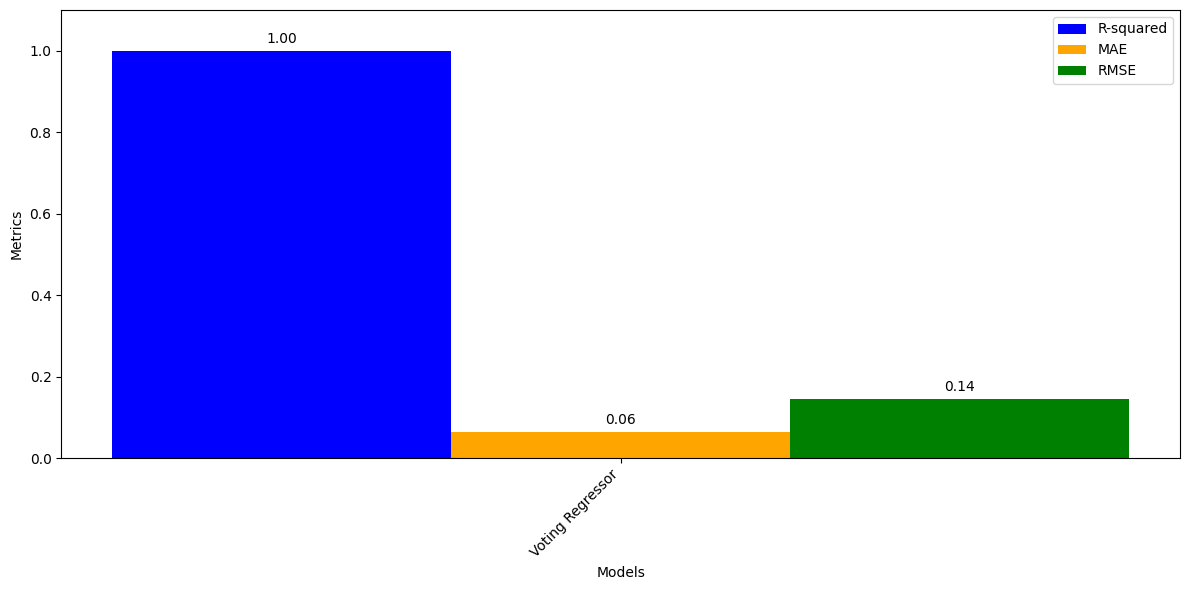

In [34]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/voting_model.pkl")
# Add other models as needed

# Create a dictionary for loaded models
loaded_models = {
    'Voting Regressor': tree_model,
    # Add other models as needed
}

# Evaluate and store metrics for each model
metrics = {'R-squared': [], 'MAE': [], 'RMSE': []}
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)

    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    metrics['R-squared'].append(r2)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot R-squared
plt.bar(np.arange(len(model_names)) - 0.2, metrics['R-squared'], width=0.2, label='R-squared', color='blue')
# Plot MAE
plt.bar(np.arange(len(model_names)), metrics['MAE'], width=0.2, label='MAE', color='orange')
# Plot RMSE
plt.bar(np.arange(len(model_names)) + 0.2, metrics['RMSE'], width=0.2, label='RMSE', color='green')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.ylim(0, max(max(metrics['R-squared']), max(metrics['MAE']), max(metrics['RMSE'])) + 0.1)
plt.xticks(np.arange(len(model_names)), model_names, rotation=45, ha='right')

# Add metric values on top of the bars
for i, model_name in enumerate(model_names):
    plt.text(i - 0.2, metrics['R-squared'][i] + 0.02, f'{metrics["R-squared"][i]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i, metrics['MAE'][i] + 0.02, f'{metrics["MAE"][i]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i + 0.2, metrics['RMSE'][i] + 0.02, f'{metrics["RMSE"][i]:.2f}', ha='center', color='black', fontsize=10)

plt.legend()
plt.tight_layout()

plt.show()


<ipython-input-35-37be8afffa6a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


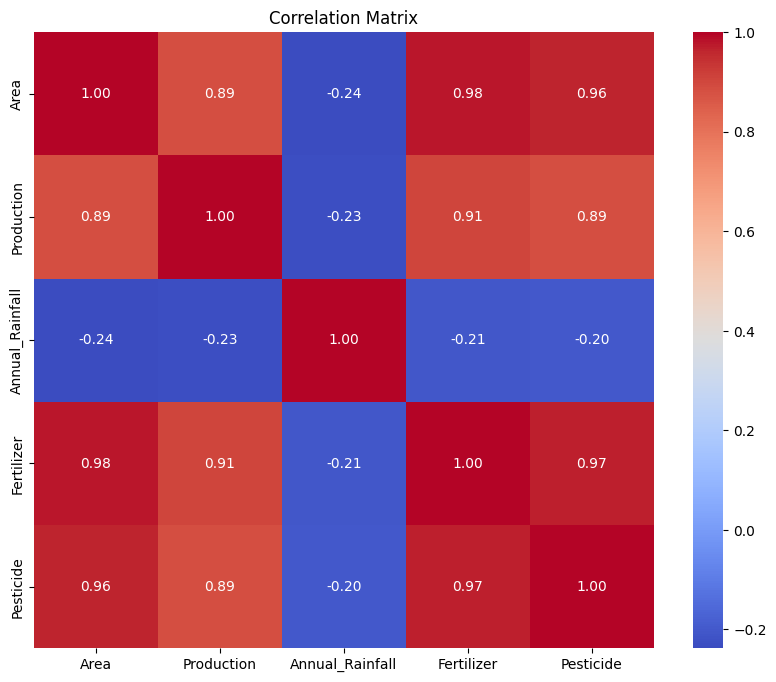

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame
correlation_matrix = X_train.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


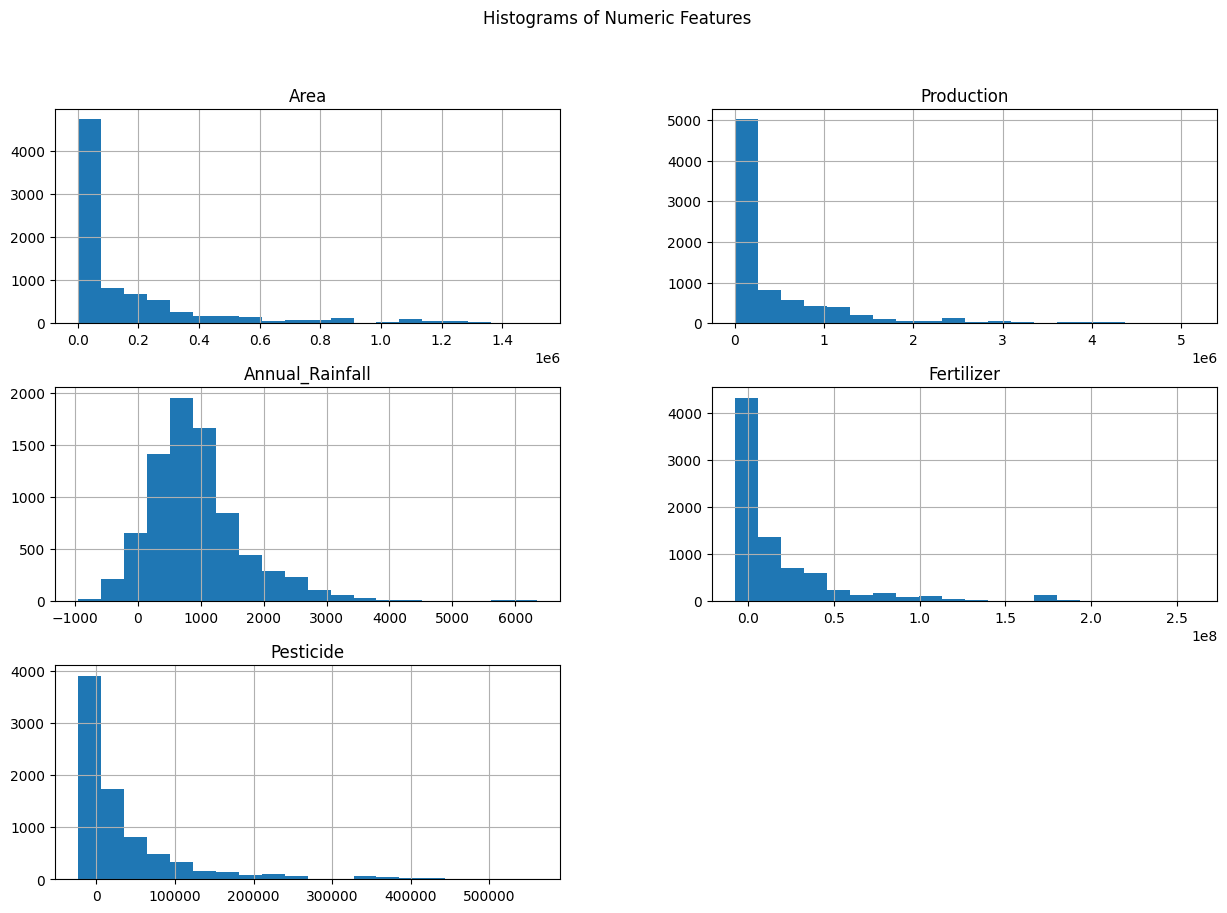

In [36]:
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()


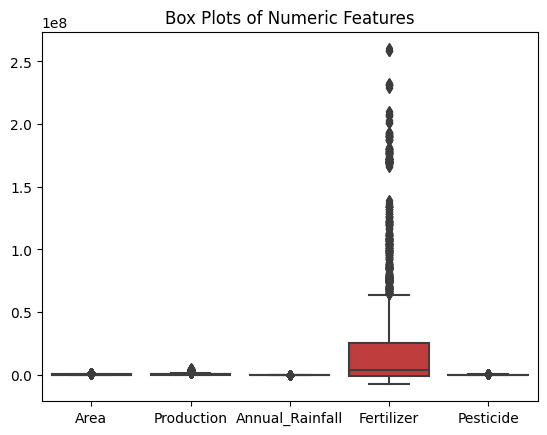

In [37]:
import seaborn as sns

sns.boxplot(data=X_train[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])
plt.title('Box Plots of Numeric Features')
plt.show()


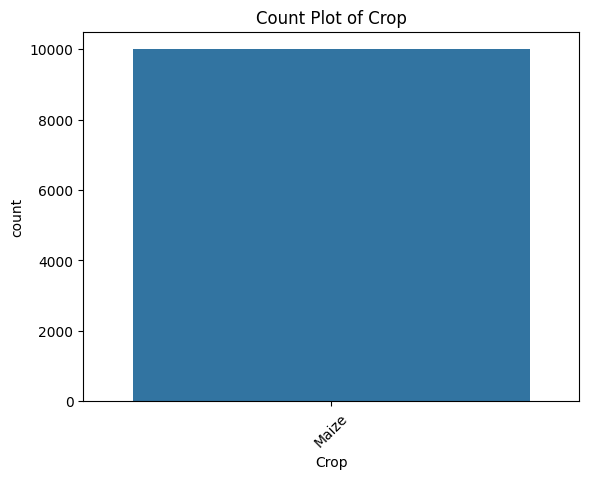

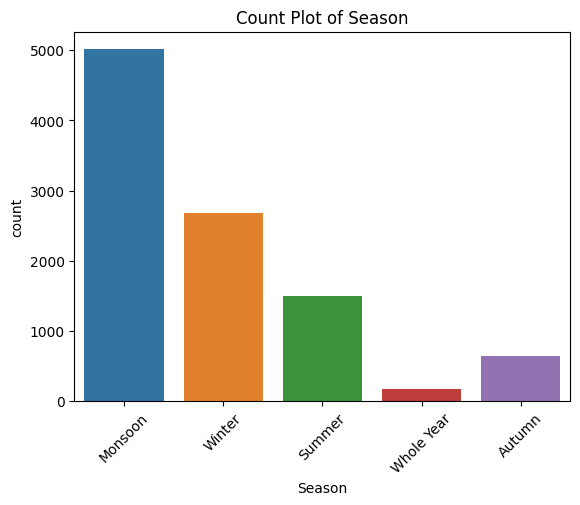

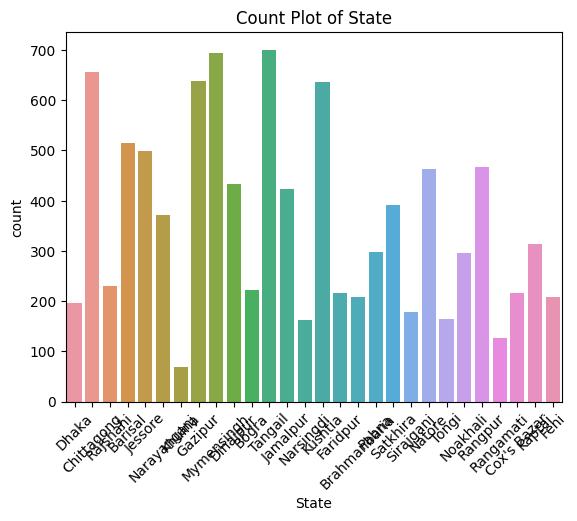

In [38]:
for column in ['Crop', 'Season', 'State']:
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Adjust the rotation angle as needed
    plt.show()


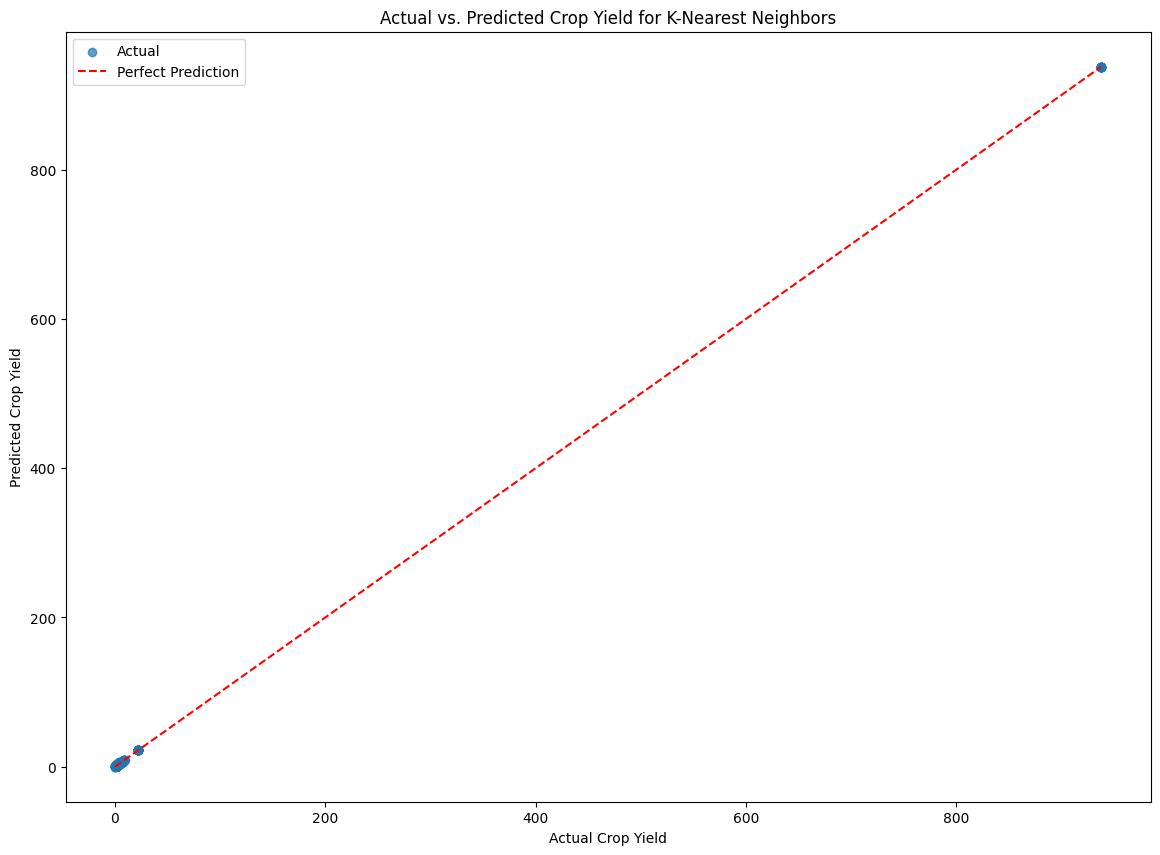

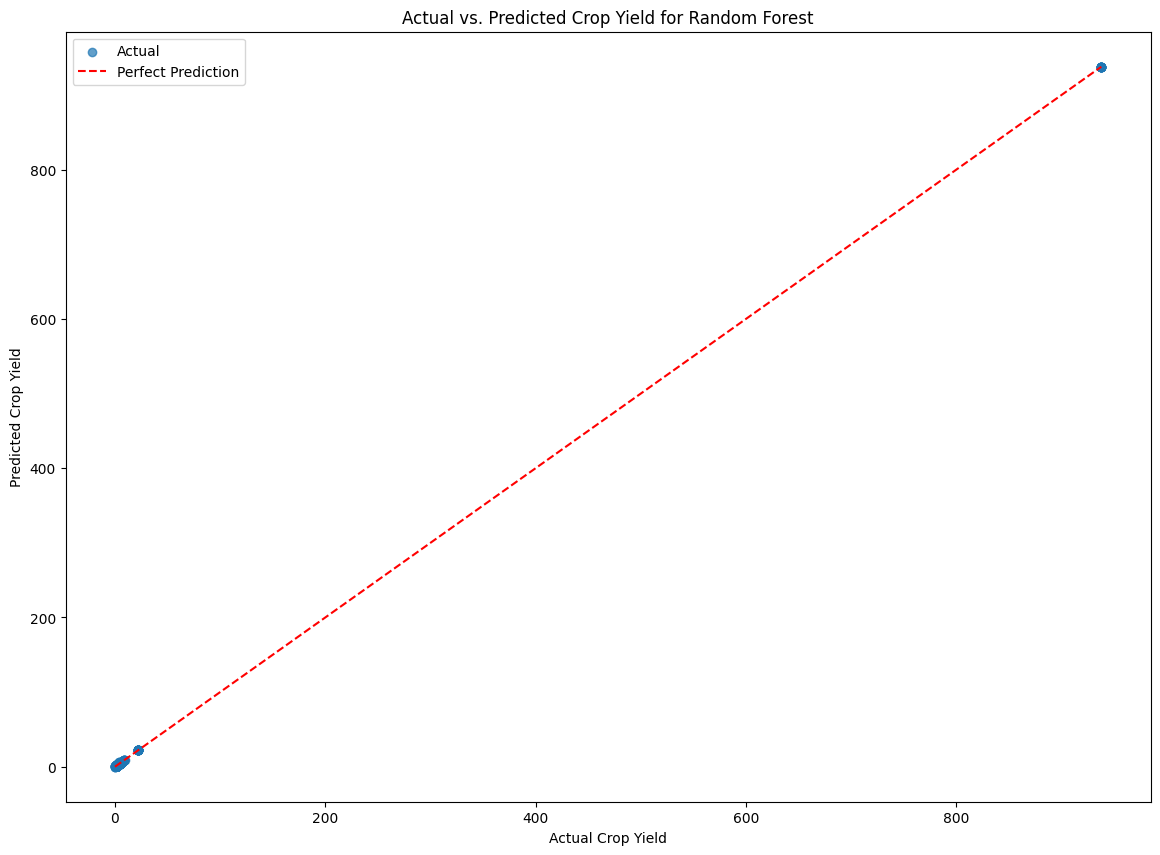

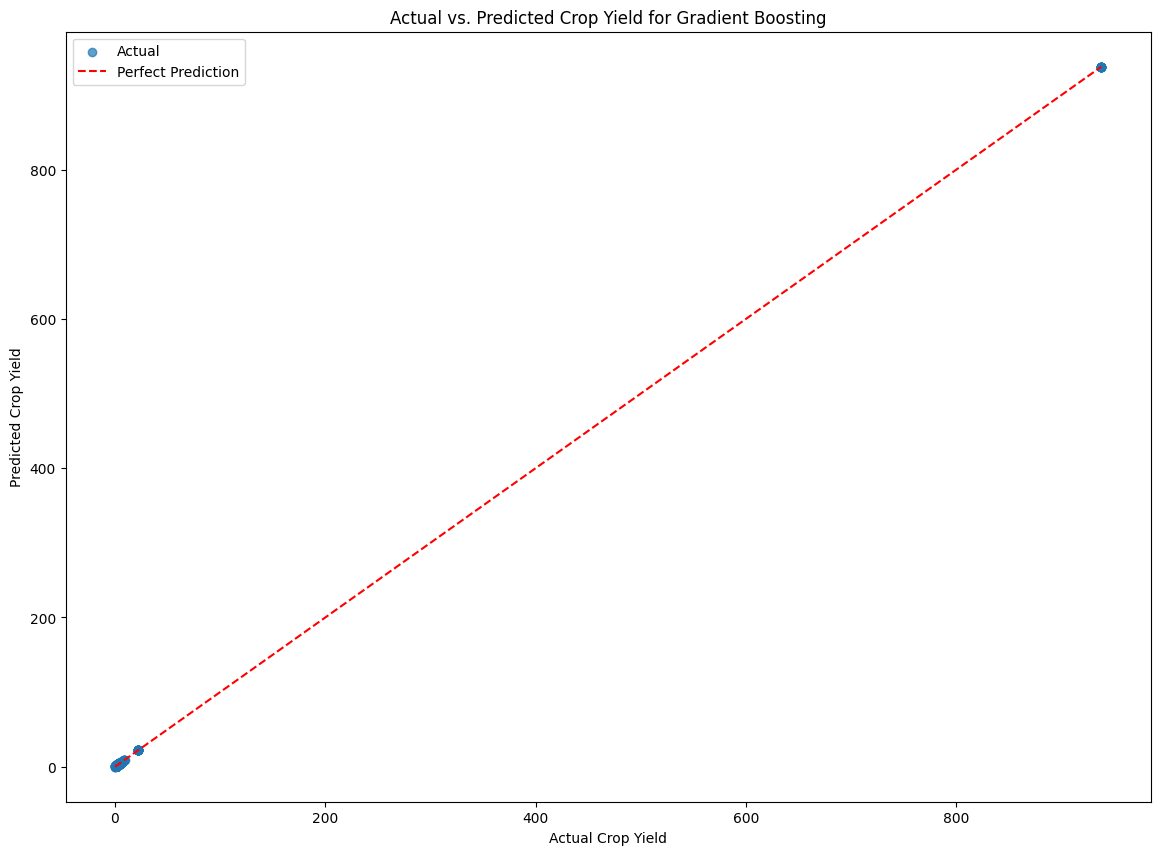

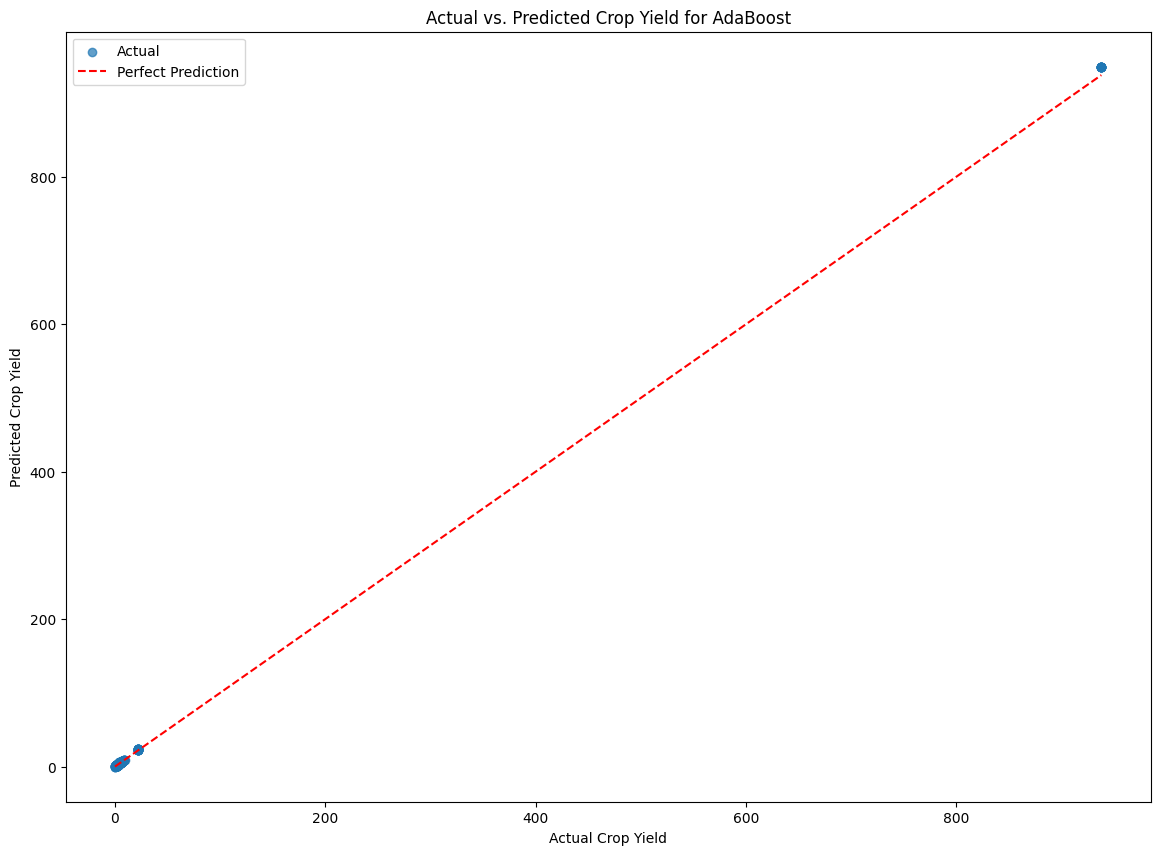

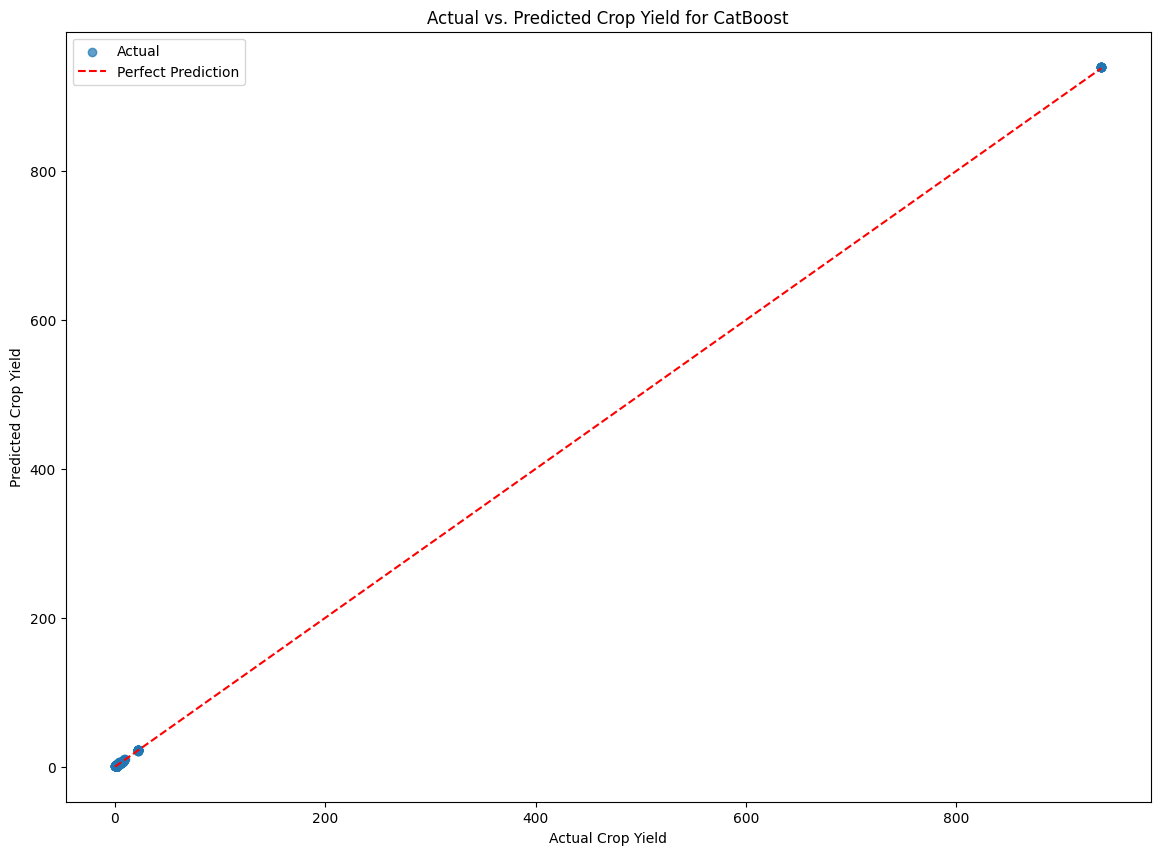

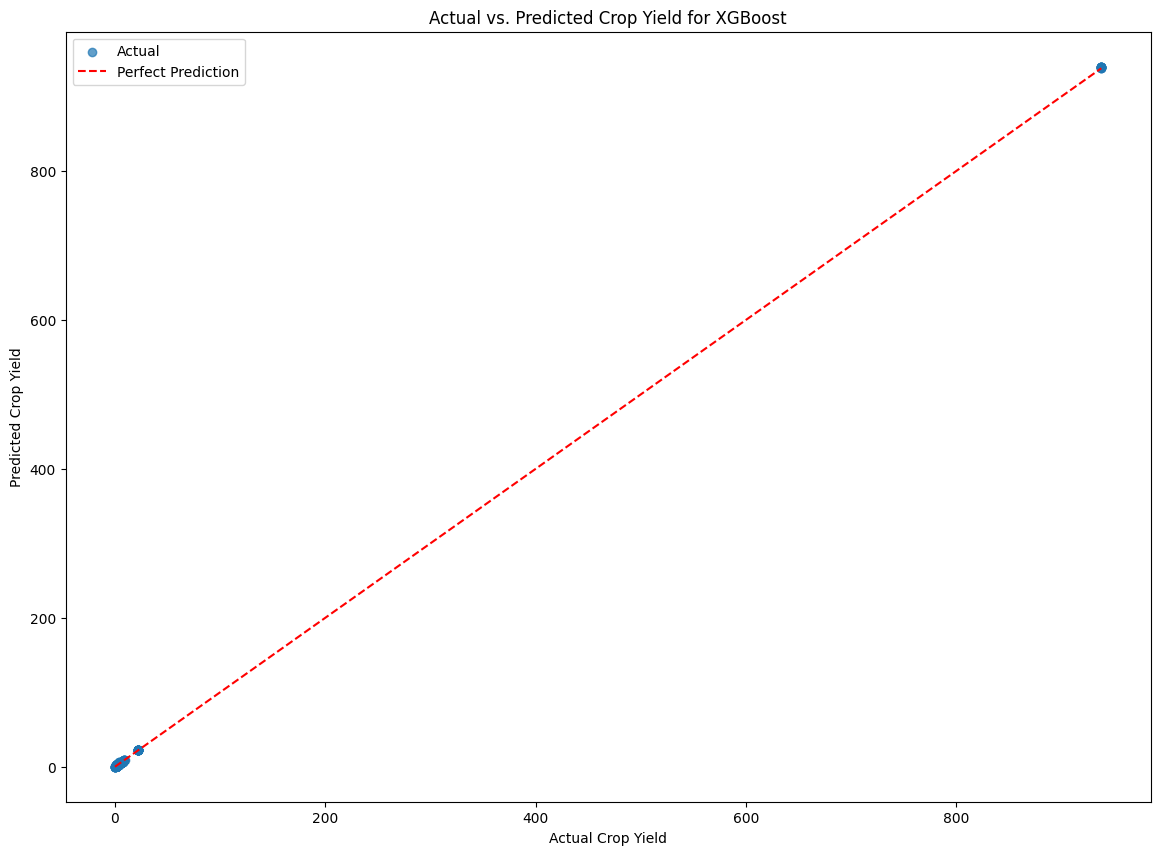

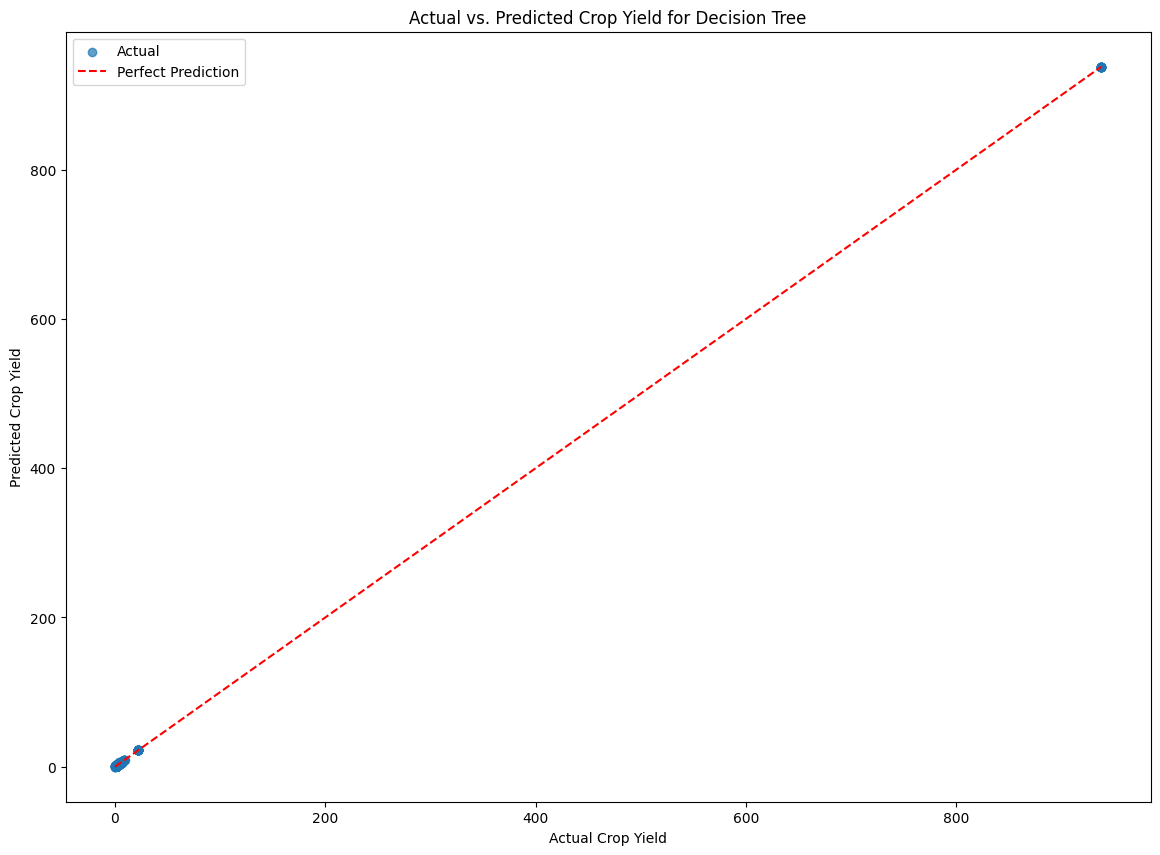

In [39]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/stacking_with_decision_tree_as_final_estimator_model.pkl")
knn_model = joblib.load("/content/stacking_with_knn_as_final_estimator_model.pkl")
rf_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
gb_model = joblib.load("/content/stacking_with_gradient_boosting_as_final_estimator_model.pkl")
ada_model = joblib.load("/content/stacking_with_adaboost_as_final_estimator_model.pkl")
cat_model = joblib.load("/content/stacking_with_catboost_as_final_estimator_model.pkl")
#linear_model = joblib.load("/content/svr_bagging_model.pkl")
#svm_model = joblib.load("/content/stacking_with_svr_as_final_estimator_model.pkl")
xgb_model = joblib.load("/content/stacking_with_xgboost_as_final_estimator_model.pkl")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())
predictions_dict = {}

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    predictions_dict[model_name] = {'actual': y_test, 'predicted': test_predictions}

# Scatter plot for actual vs. predicted for each model
for model_name, predictions in predictions_dict.items():
    plt.figure(figsize=(14, 10))
    plt.scatter(predictions['actual'], predictions['predicted'], label='Actual', alpha=0.7)
    plt.plot([min(predictions['actual']), max(predictions['actual'])], [min(predictions['actual']), max(predictions['actual'])], '--', color='red', label='Perfect Prediction')
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.title(f"Actual vs. Predicted Crop Yield for {model_name}")
    plt.legend()
    plt.show()


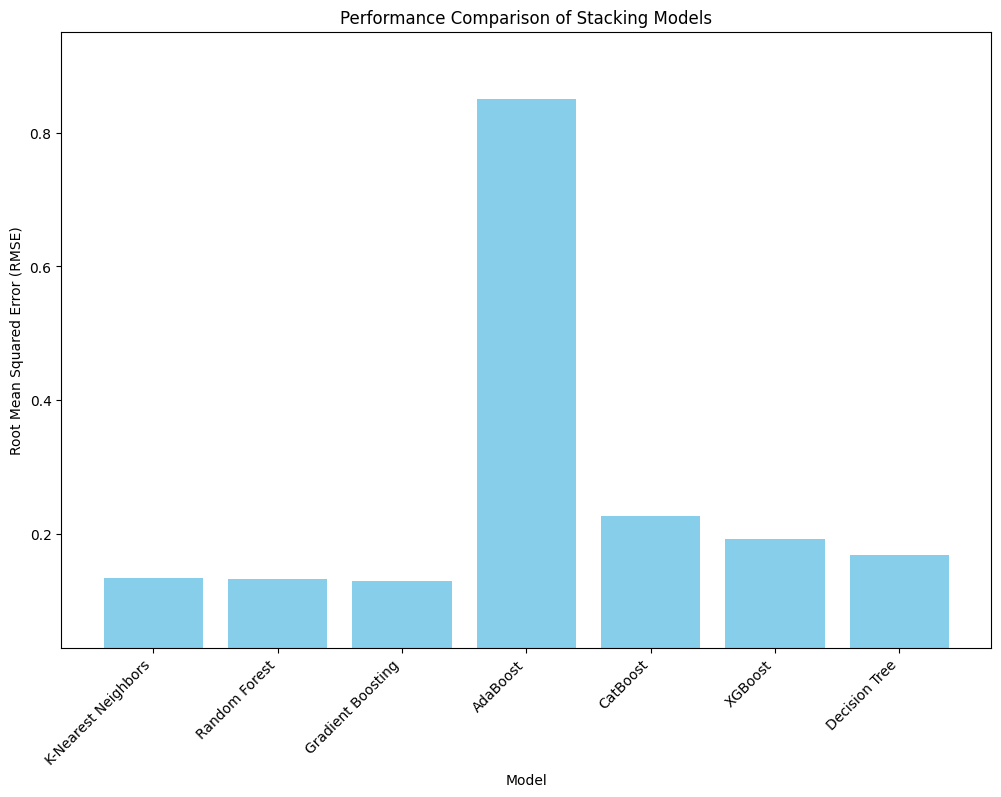

In [40]:
# Bar chart for RMSE scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Performance Comparison of Stacking Models')
plt.ylim([min(rmse_scores) - 0.1, max(rmse_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


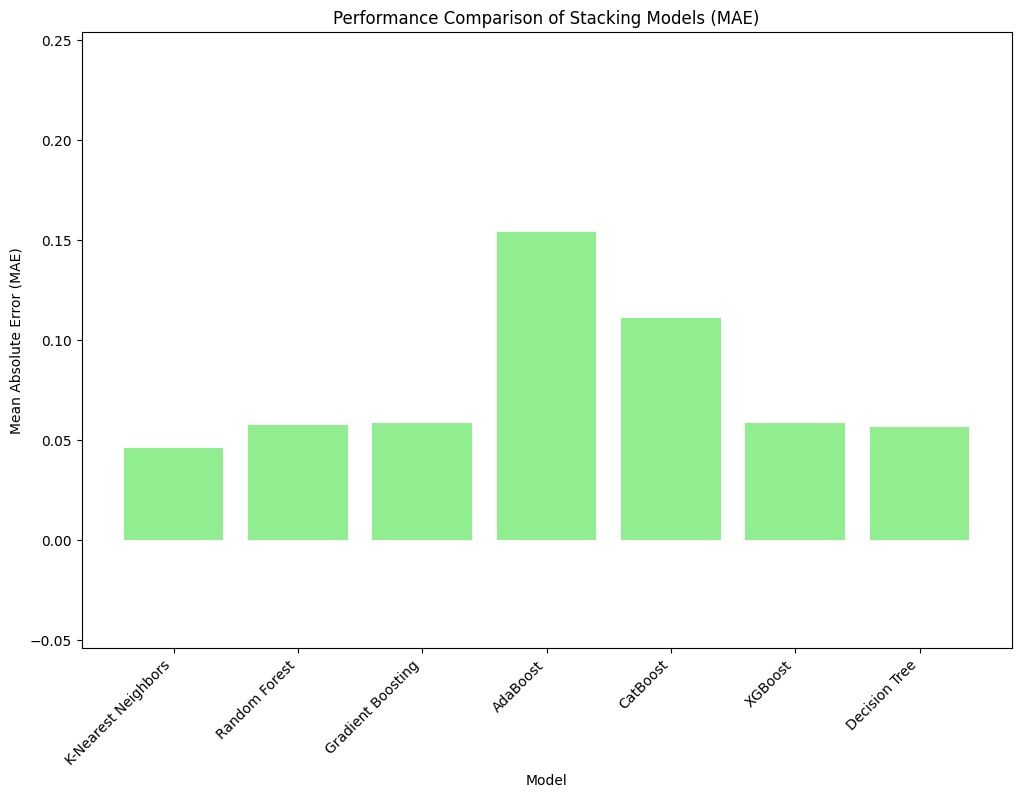

In [41]:
from sklearn.metrics import mean_absolute_error

# Evaluate and store MAE scores for each model
mae_scores = []

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mae = mean_absolute_error(y_test, test_predictions)
    mae_scores.append(mae)

# Bar chart for MAE scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, mae_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance Comparison of Stacking Models (MAE)')
plt.ylim([min(mae_scores) - 0.1, max(mae_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


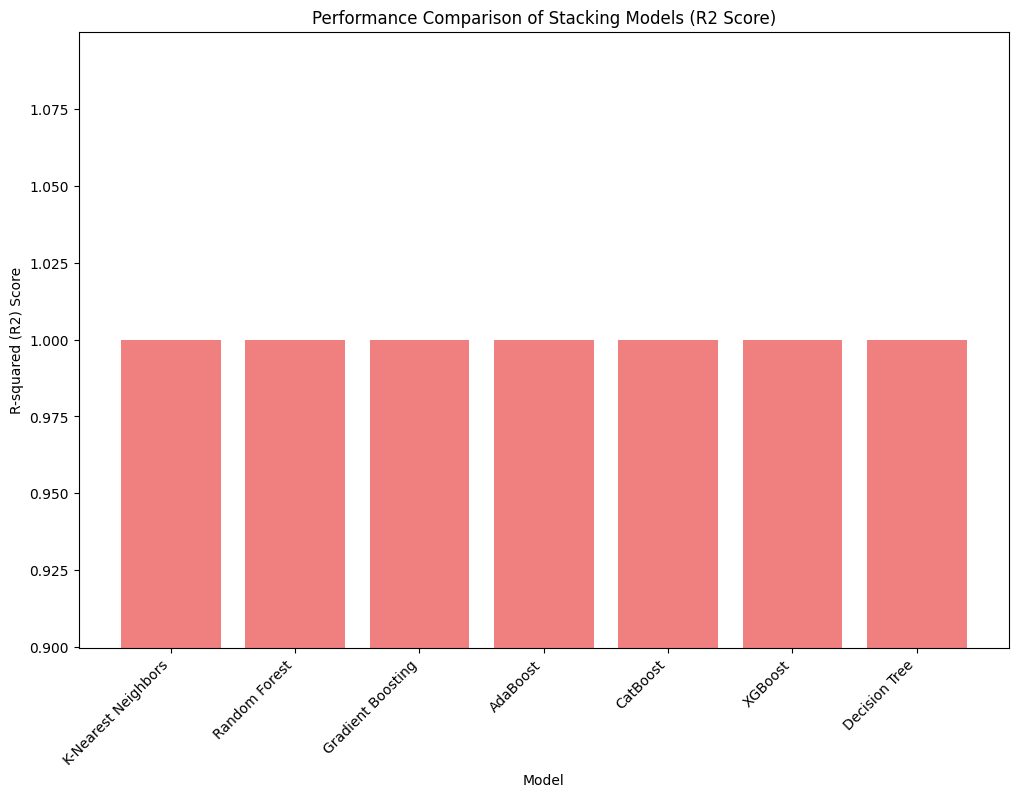

In [42]:
from sklearn.metrics import r2_score

# Evaluate and store R2 scores for each model
r2_scores = []

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    r2 = r2_score(y_test, test_predictions)
    r2_scores.append(r2)

# Bar chart for R2 scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, r2_scores, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('Performance Comparison of Stacking Models (R2 Score)')
plt.ylim([min(r2_scores) - 0.1, max(r2_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


In [33]:
import pandas as pd
import numpy as np

# Specify the path to your original CSV file
csv_file_path = '/content/maize1.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Drop the 'Crop_Year' column
df = df.drop(columns=['Crop_Year'])

# Subtract specific values from columns before creating new rows


# Get the number of rows you want to create
target_rows = 10000

# Duplicate rows randomly to reach the target number of rows
while len(df) < target_rows:
    # Randomly choose an index from the existing rows
    random_index = np.random.choice(len(df))

    # Select the row at the random index
    random_row = df.iloc[random_index].copy()

    # Modify the 'Yield' column by dividing the value by areas
    random_row['Annual_Rainfall'] -= 200
    random_row['Fertilizer'] -= 1000000  # Subtract 10 lakhs
    random_row['Pesticide'] -= 3000
    random_row['Yield'] = random_row['Production'] / random_row['Area']

    # Append the modified row to the DataFrame
    df = df.append(random_row, ignore_index=True)

# Save the updated DataFrame to a new CSV file
output_csv_path = '/content/rice_updated10k.csv'
df.to_csv(output_csv_path, index=False)

# Display the updated DataFrame
print(df)

<ipython-input-33-955874f3205b>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(random_row, ignore_index=True)


       Crop   Season       State      Area  Production  Annual_Rainfall  \
0     Maize  Monsoon       Dhaka   19216.0       14721           2051.4   
1     Maize  Monsoon  Chittagong  502797.0     1391132           1266.7   
2     Maize   Winter  Chittagong   48844.0       98932           1266.7   
3     Maize   Summer  Chittagong    9730.0       20893           1266.7   
4     Maize  Monsoon    Rajshahi   17175.0       24878           3818.2   
...     ...      ...         ...       ...         ...              ...   
9995  Maize   Winter     Jessore  281008.0     1764883            311.0   
9996  Maize  Monsoon        Feni   36720.0       53210           1896.2   
9997  Maize  Monsoon    Jamalpur    5618.0        7994           1648.8   
9998  Maize  Monsoon    Dinajpur  443500.0      884600           -133.5   
9999  Maize  Monsoon     Barisal   35267.0       88264            907.7   

       Fertilizer  Pesticide     Yield  
0      1828786.72    5956.96  0.615652  
1     47851190.49

In [1]:
import pandas as pd

# Replace 'your_input_file.csv' with your actual file name
input_file_path = '/content/crop_yield_final.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file_path)

# Filter rows where 'crop_names' is 'Rice'
rice_df = df[df['Crop'] == 'Maize']

# Print the number of rows with 'Rice' in 'crop_names' column
num_rows_with_rice = len(rice_df)
print(f"Number of rows with 'Rice' in 'crop_names' column: {num_rows_with_rice}")

# If you want to save the filtered DataFrame to a new CSV file, you can uncomment the following lines:
# output_file_path = 'output_file_rice.csv'
# rice_df.to_csv(output_file_path, index=False)
# print(f"Rows with 'Rice' in 'crop_names' column saved to {output_file_path}")


Number of rows with 'Rice' in 'crop_names' column: 975


In [4]:
import pandas as pd

# Replace 'your_input_file.csv' and 'output_file_rice.csv' with your actual file names
input_file_path = '/content/crop_yield_final.csv'
output_file_path = '/content/maize1.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file_path)

# Filter rows where 'crop_names' is 'Rice'
rice_df = df[df['Crop'] == 'Maize']

# Write the filtered DataFrame to a new CSV file
rice_df.to_csv(output_file_path, index=False)

print(f"Rows with 'Rice' in 'crop_names' column saved to {output_file_path}")


Rows with 'Rice' in 'crop_names' column saved to /content/maize1.csv
